In [1]:
from tiger_agent import ActorCriticTigerAgent
from tiger_env import TIGER_ENV
from tiger_model import ActorModel, CriticModel
from matplotlib import pyplot as plt
from livelossplot import PlotLosses
import numpy as np
import torch
torch.manual_seed(5) 


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
avg_gradients = []
advantages = []
values = []

In [ ]:
max_number_of_turns = 30
size = 5
tiger_reward_scheme = {"eating": 0.1, "winning": 0.5, "losing": -0.5, "no score": 0}


# Initialize environment and models
tiger_env = TIGER_ENV(size, max_number_of_turns, tiger_reward_scheme)
actor_model = ActorModel(size)
critic_model = CriticModel(size)
tiger_agent = ActorCriticTigerAgent(actor_model, critic_model, tiger_env, size, tiger_reward_scheme, max_number_of_turns)
tiger_agent.actor_load_model('weights\\Tiger_weights\\step_weights\\Actor/Actor_model_v0_size_5_run_156000.pth')
tiger_agent.critic_load_model('weights\\Tiger_weights\\step_weights\\critic_model_v0_size_5_run_156000.pth')

number_of_runs = 45000

def main(monitoring_type):
    monitoring_plot = PlotLosses()
    avg_rewards = []
    step = 100

    for i in range(number_of_runs):
        try:
            avg_reward,current_advantages,current_values,states = tiger_agent.learn()
            avg_rewards.append(avg_reward)
            advantages.extend(current_advantages)
            values.extend(current_values)

            if monitoring_type == "cumulative_average_reward":
                if i % step == 0 and i != 0:
                    monitoring_plot.update({'recent average tiger reward per episode': np.mean(avg_rewards[-500:])})
                    monitoring_plot.draw()
                    torch.save(actor_model.state_dict(), f'weights\Tiger_weights\step_weights/Actor/Actor_model_v0_size_5_run_{i+156000}.pth')
                    torch.save(critic_model.state_dict(), f'weights\Tiger_weights\step_weights/critic_model_v0_size_5_run_{i+156000}.pth')
        
        except Exception as e:
            print(e)
            break
            


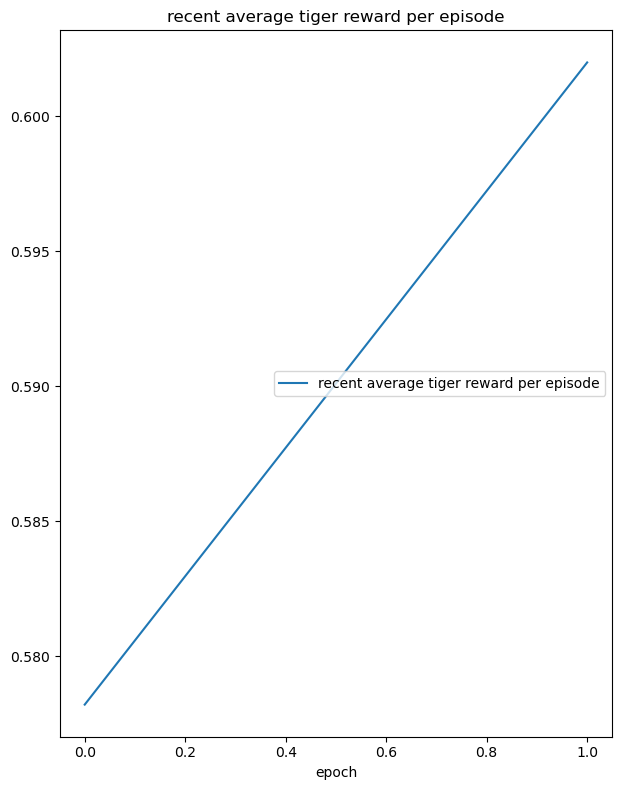

recent average tiger reward per episode
	recent average tiger reward per episode 	 (min:    0.578, max:    0.602, cur:    0.602)


KeyboardInterrupt: 

In [5]:
main("cumulative_average_reward")

In [9]:
advantages_int = [float(x) for x in advantages]
print(advantages_int)
      

[-0.005934029817581177, -0.0168953537940979, -0.00982331857085228, 0.0029041320085525513, 0.00417819619178772, -0.005116485059261322, 0.00042500346899032593, -0.007596269249916077, 0.10878559201955795, 0.11502297967672348, 0.011611688882112503, -0.014004316180944443, 0.004059556871652603, -0.012207262217998505, -0.0032769441604614258, -0.005164779722690582, 0.0028367266058921814, 0.09652450680732727, 0.007288448512554169, -0.011179089546203613, 0.09012822806835175, 0.009977519512176514, -0.0025484487414360046, 0.01417984813451767, -0.012969307601451874, 0.5642770528793335, 0.007937563583254814, 0.0009786207228899002, -0.004541799426078796, 0.00018851272761821747, 0.09849603474140167, -0.004797095432877541, 0.004036394879221916, -0.01603166200220585, -0.00016935914754867554, 0.1029915064573288, 0.002939824014902115, 0.09848413616418839, -0.002005571499466896, -0.011599553748965263, 0.008606841787695885, 0.0007767491042613983, 0.0005661752074956894, -0.007418019697070122, 0.0063860900700

In [10]:
values_int = [float(x) for x in values]
print(values_int)

[-0.027254343032836914, -0.03623606264591217, -0.0566069670021534, -0.07038043439388275, -0.06979969888925552, -0.0669986754655838, -0.07429884374141693, -0.07583162188529968, -0.08646098524332047, -0.07657865434885025, -0.05984664708375931, -0.04694826155900955, -0.0594293549656868, -0.054160431027412415, -0.06590566784143448, -0.06909117847681046, -0.0744757428765297, -0.0714830756187439, -0.07266488671302795, -0.06337692588567734, -0.07321473956108093, -0.08075259625911713, -0.06840397417545319, -0.06912294030189514, -0.05285963416099548, -0.06427707523107529, -0.031742244958877563, -0.02254468761384487, -0.020016523078083992, -0.023502273485064507, -0.02235051617026329, -0.022215083241462708, -0.02559909224510193, -0.020026573911309242, -0.035295695066452026, -0.034870170056819916, -0.03022986650466919, -0.02559499442577362, -0.025053784251213074, -0.025141501799225807, -0.034974295645952225, -0.024773772805929184, -0.02244461700320244, -0.02050035633146763, -0.02707849070429802, -

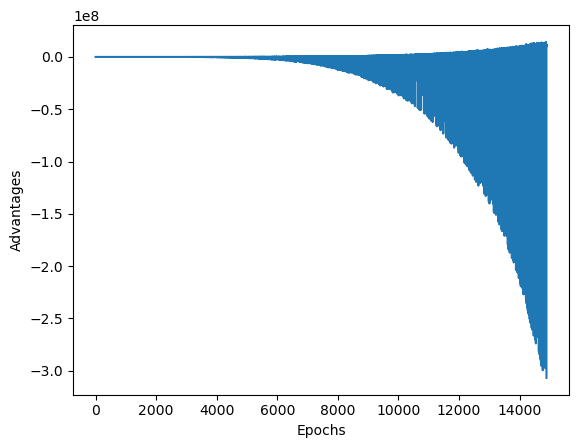

In [11]:
plt.plot(advantages_int)
plt.xlabel('Epochs')
plt.ylabel('Advantages')
plt.show()


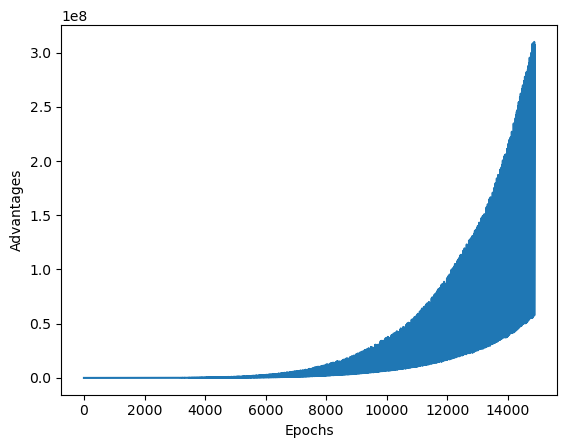

In [12]:
plt.plot(values_int)
plt.xlabel('Epochs')
plt.ylabel('Advantages')
plt.show()

In [7]:
import torch
torch.save(model.state_dict(), 'model_v3_size_5.pth')

In [ ]:
# Define the array
 

action,action_dist = tiger_agent.predict_action(arr)

c:\Users\MaxA\Desktop\Bhag Chal\tiger_agent.py:148: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, dtype=torch.float32)


ValueError: Expected parameter probs (Tensor of shape (1, 25)) of distribution Categorical(probs: torch.Size([1, 25])) to satisfy the constraint Simplex(), but found invalid values:
tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan]], grad_fn=<DivBackward0>)